# Diabetes Classification
### Machine Learning Algorithms Used: Support Vector Machine (SVM) and Logistic Regression for Classification
### Language: Python
### Libraries: Numpy, Pandas, scikit-learn, mathplotlib and seaborn

In [2]:
#imports for Data and training etc
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Graphing Stuff
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [3]:

#Read Data and Print first 5 row/columns
data = pd.read_csv("diabetes.csv")

#Will be used for heatMap, gives correlation between features
correlation_matrix = data.corr()


data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#0 Corresponds to not diabetic and 1 corresponds to diabetic

#Number of Rows and Columns
print(data.shape)

#We have 768 Rows and 9 Columns

(768, 9)


In [5]:
#Get Statistical Data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Find it any Missing Data Exists
print(data.isnull().sum())

#No Null Data W

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Visualizing Correlation With a HeatMap

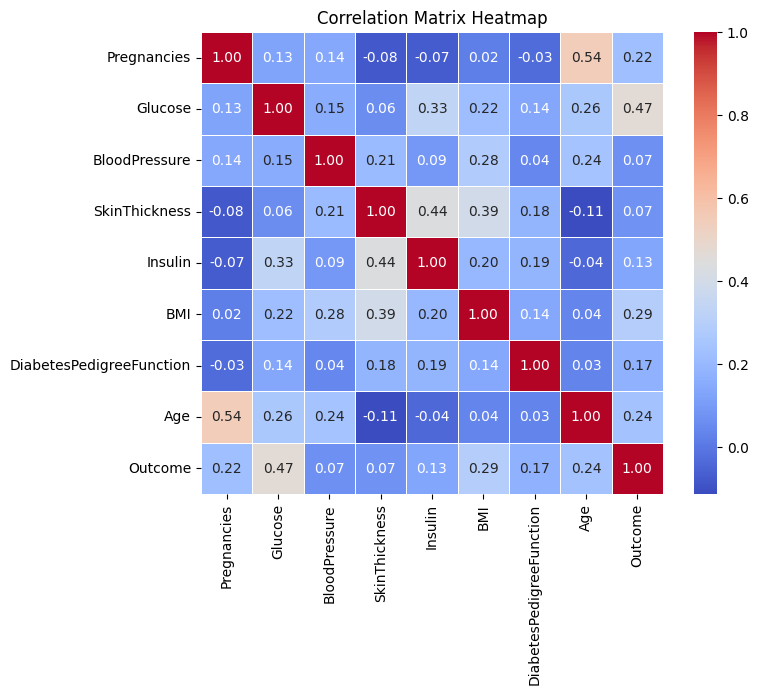

In [7]:
#Visualizing how each Column is correlated with a heatMap

plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

### Outcome is most correlated with Glucose, Least Correlated (from the current features) with SkinThickness and BloodPressure.

In [8]:
#Seperation of Data

y = data['Outcome']
X = data.drop(columns='Outcome', axis = 1)

print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# Standardize Data
Converts Data to a common format (Mean of 0, std Deviation of 1). Helps model perform better.

In [9]:
scaler = StandardScaler()

#Fits and Transforms Data to a common range
standardizedData = scaler.fit_transform(X)

X = standardizedData

#Values much more closer to one another
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


## Split Train and Test Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
#Check the Shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


## Training Model with Support Vector Machine (SVM)

In [12]:
#Svm  
model = svm.SVC(kernel="linear")

In [13]:
#Training our classifier 
model.fit(X_train, y_train)

SVC(kernel='linear')

#### Evaluating SVM Train Data

In [14]:
#Making predictions and finding accuracy score
yTrain_predictions = model.predict(X_train)

trainAccuracy = accuracy_score(yTrain_predictions, y_train)

#77% Accurate on Train Data
print(trainAccuracy)

0.7719869706840391


#### Evaluating SVM Test Data

In [15]:
#Making predictions and finding accuracy score
yTest_predictions = model.predict(X_test)

testAccuracy = accuracy_score(yTest_predictions, y_test)

#78% Accurate on Test Data about
print(testAccuracy)

0.7792207792207793


# Training Model Using Logistic Regression

In [16]:
model2 = LogisticRegression()

model2.fit(X_train, y_train)

LogisticRegression()

#### Evaluating Logistic Regression Train Data

In [17]:
logTrainPredicts = model2.predict(X_train)

logTrainAccuracy = accuracy_score(logTrainPredicts, y_train)

#77.5% Accurate on Train Data about
print(logTrainAccuracy)

0.7752442996742671


#### Evaluating Logistic Regression Test Data

In [18]:
logTestPredicts = model2.predict(X_test)

logTestAccuracy = accuracy_score(logTestPredicts, y_test)

#78% Accurate on Test Data about (Didn't change)
print(logTestAccuracy)

0.7792207792207793


#### Conclusion: SVM performed better with Train Data. For Test Data, both performed about the same.